In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Importing necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
# conda install -c conda-forge imbalanced-learn 

In [5]:
# Importing Dataset
pd.set_option('display.max_columns', 500)
df=pd.read_csv('Data file.csv')

In [6]:
df

Unnamed: 0  label       msisdn     aon  daily_decr30  daily_decr90  \
0                1      0  21408I70789   272.0   3055.050000   3065.150000   
1                2      1  76462I70374   712.0  12122.000000  12124.750000   
2                3      1  17943I70372   535.0   1398.000000   1398.000000   
3                4      1  55773I70781   241.0     21.228000     21.228000   
4                5      1  03813I82730   947.0    150.619333    150.619333   
...            ...    ...          ...     ...           ...           ...   
209588      209589      1  22758I85348   404.0    151.872333    151.872333   
209589      209590      1  95583I84455  1075.0     36.936000     36.936000   
209590      209591      1  28556I85350  1013.0  11843.111667  11904.350000   
209591      209592      1  59712I82733  1732.0  12488.228333  12574.370000   
209592      209593      1  65061I85339  1581.0   4489.362000   4534.820000   

        rental30  rental90  last_rech_date_ma  last_rech_date_da  \
0         220.13    260.13                2.0                0.0   
1        3691.26   3691.26               20.0                0.0   
2         900.13    900.13                3.0                0.0   
3         159.42    159.42               41.0                0.0   
4        1098.90   1098.90                4.0                0.0   
...          ...       ...                ...                ...   
209588   1089.19   1089.19                1.0                0.0   
209589   1728.36   1728.36                4.0                0.0   
209590   5861.83   8893.20                3.0                0.0   
209591    411.83    984.58                2.0               38.0   
209592    483.92    631.20               13.0                0.0   

        last_rech_amt_ma  cnt_ma_rech30  fr_ma_rech30  sumamnt_ma_rech30  \
0                   1539              2          21.0             3078.0   
1                   5787              1           0.0             5787.0   
2                   1539              1           0.0             1539.0   
3                    947              0           0.0                0.0   
4                   2309              7           2.0            20029.0   
...                  ...            ...           ...                ...   
209588              4048              3           2.0            10404.0   
209589               773              4           1.0             3092.0   
209590              1539              5           8.0             9334.0   
209591               773              5           4.0            12154.0   
209592              7526              2           1.0             9065.0   

        medianamnt_ma_rech30  medianmarechprebal30  cnt_ma_rech90  \
0                     1539.0                  7.50              2   
1                     5787.0                 61.04              1   
2                     1539.0                 66.32              1   
3                        0.0                  0.00              1   
4                     2309.0                 29.00              8   
...                      ...                   ...            ...   
209588                3178.0                 91.81              3   
209589                 773.0                161.30              6   
209590                1539.0                 51.13             11   
209591                 773.0                164.00              6   
209592                4532.5                356.70              3   

        fr_ma_rech90  sumamnt_ma_rech90  medianamnt_ma_rech90  \
0                 21               3078                1539.0   
1                  0               5787                5787.0   
2                  0               1539                1539.0   
3                  0                947                 947.0   
4                  2              23496                2888.0   
...              ...                ...                   ...   
209588             2              10404                31


Data_Description

label : Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}

msisdn : mobile number of user

aon : age on cellular network in days

daily_decr30: Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)

daily_decr90: Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)

rental30: Average main account balance over last 30 days

rental90: Average main account balance over last 90 days

last_rech_date_ma: Number of days till last recharge of main account

last_rech_date_da: Number of days till last recharge of data account

last_rech_amt_ma: Amount of last recharge of main account (in Indonesian Rupiah)

cnt_ma_rech30: Number of times main account got recharged in last 30 days

fr_ma_rech30: Frequency of main account recharged in last 30 days

sumamnt_ma_rech30: Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)

medianamnt_ma_rech30: Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah)

medianmarechprebal30: Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)

cnt_ma_rech90: Number of times main account got recharged in last 90 days

fr_ma_rech90: Frequency of main account recharged in last 90 days

sumamnt_ma_rech90 : Total amount of recharge in main account over last 90 days (in Indian Rupee)

medianamnt_ma_rech90: Median of amount of recharges done in main account over last 90 days at user level (in Indian Rupee)

medianmarechprebal90: Median of main account balance just before recharge in last 90 days at user level (in Indian Rupee)

cnt_da_rech30: Number of times data account got recharged in last 30 days

fr_da_rech30: Frequency of data account recharged in last 30 days

cnt_da_rech90: Number of times data account got recharged in last 90 days

fr_da_rech90: Frequency of data account recharged in last 90 days

cnt_loans30: Number of loans taken by user in last 30 days

amnt_loans30: Total amount of loans taken by user in last 30 days

maxamnt_loans30: maximum amount of loan taken by the user in last 30 days

medianamnt_loans30: Median of amounts of loan taken by the user in last 30 days

cnt_loans90: Number of loans taken by user in last 90 days

amnt_loans90: Total amount of loans taken by user in last 90 days

maxamnt_loans90: maximum amount of loan taken by the user in last 90 days

medianamnt_loans90: Median of amounts of loan taken by the user in last 90 days

payback30: Average payback time in days over last 30 days

payback90: Average payback time in days over last 90 days

pcircle: telecom circle

pdate: date


In [7]:
df=df.drop('Unnamed: 0',axis=1)

In [8]:
#checking null values
df.isnull().sum()

label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

In [9]:
# Checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  object 
 2   aon                   209593 non-null  float64
 3   daily_decr30          209593 non-null  float64
 4   daily_decr90          209593 non-null  float64
 5   rental30              209593 non-null  float64
 6   rental90              209593 non-null  float64
 7   last_rech_date_ma     209593 non-null  float64
 8   last_rech_date_da     209593 non-null  float64
 9   last_rech_amt_ma      209593 non-null  int64  
 10  cnt_ma_rech30         209593 non-null  int64  
 11  fr_ma_rech30          209593 non-null  float64
 12  sumamnt_ma_rech30     209593 non-null  float64
 13  medianamnt_ma_rech30  209593 non-null  float64
 14  medianmarechprebal30  209593 non-null  float64
 15  

In [10]:
df.describe()

label            aon   daily_decr30   daily_decr90  \
count  209593.000000  209593.000000  209593.000000  209593.000000   
mean        0.875177    8112.343445    5381.402289    6082.515068   
std         0.330519   75696.082531    9220.623400   10918.812767   
min         0.000000     -48.000000     -93.012667     -93.012667   
25%         1.000000     246.000000      42.440000      42.692000   
50%         1.000000     527.000000    1469.175667    1500.000000   
75%         1.000000     982.000000    7244.000000    7802.790000   
max         1.000000  999860.755168  265926.000000  320630.000000   

            rental30       rental90  last_rech_date_ma  last_rech_date_da  \
count  209593.000000  209593.000000      209593.000000      209593.000000   
mean     2692.581910    3483.406534        3755.847800        3712.202921   
std      4308.586781    5770.461279       53905.892230       53374.833430   
min    -23737.140000  -24720.580000         -29.000000         -29.000000   
25%       280.420000     300.260000           1.000000           0.000000   
50%      1083.570000    1334.000000           3.000000           0.000000   
75%      3356.940000    4201.790000           7.000000           0.000000   
max    198926.110000  200148.110000      998650.377733      999171.809410   

       last_rech_amt_ma  cnt_ma_rech30   fr_ma_rech30  sumamnt_ma_rech30  \
count     209593.000000  209593.000000  209593.000000      209593.000000   
mean        2064.452797       3.978057    3737.355121        7704.501157   
std         2370.786034       4.256090   53643.625172       10139.621714   
min            0.000000       0.000000       0.000000           0.000000   
25%          770.000000       1.000000       0.000000        1540.000000   
50%         1539.000000       3.000000       2.000000        4628.000000   
75%         2309.000000       5.000000       6.000000       10010.000000   
max        55000.000000     203.000000  999606.368132      810096.000000   

       medianamnt_ma_rech30  medianmarechprebal30  cnt_ma_rech90  \
count         209593.000000         209593.000000   209593.00000   
mean            1812.817952           3851.927942        6.31543   
std             2070.864620          54006.374433        7.19347   
min                0.000000           -200.000000        0.00000   
25%              770.000000             11.000000        2.00000   
50%             1539.000000             33.900000        4.00000   
75%             1924.000000             83.000000        8.00000   
max            55000.000000         999479.419319      336.00000   

        fr_ma_rech90  sumamnt_ma_rech90  medianamnt_ma_rech90  \
count  209593.000000      209593.000000         209593.000000   
mean        7.716780       12396.218352           1864.595821   
std        12.590251       16857.793882           2081.680664   
min         0.000000           0.000000              0.000000   
25%         0.000000        2317.000000            773.000000   
50%         2.000000        7226.000000           1539.000000   
75%         8.000000       16000.000000           1924.000000   
max        88.000000      953036.000000          55000.000000   

       medianmarechprebal90  cnt_da_rech30   fr_da_rech30  cnt_da_rech90  \
count         209593.000000  209593.000000  209593.000000  209593.000000   
mean              92.025541     262.578110    3749.494447       0.041495   
std              369.215658    4183.897978   53885.414979       0.397556   
min             -200.000000       0.000000       0.000000       0.000000   
25%               14.600000       0.000000       0.000000       0.000000   
50%               36.000000       0.000000       0.000000       0.000000   
75%               79.310000       0.000000       0.000000       0.000000   
max            41456.500000   99914.441420  999809.240107      38.000000   

        fr_da_rech90    cnt_loans30   amnt_loans30  maxamnt_loans30  \
count  209593.000000  209593.000000  209593.000000    20959

       Observations:-
       1.Aon has outliers as max value is too high and min value is negative which is not possible, 
       2.for all the features we can see that the min value is negative which is not even possible for most of the features like daily recharge and main account balance, and last recharge can't be negative.

### EDA

In [11]:
#Creating balance Groups for our visiualization
lst = [df]
for column in lst:
    column.loc[column["rental30"] <= 0,  'balance_group'] = 'no balance'
    column.loc[(column["rental30"] > 0) & (column["rental30"] <= 19766), 'balance_group'] = 'low balance'
    column.loc[(column["rental30"] > 19766) & (column["rental30"] <= 118572), 'balance_group'] = 'average balance'
    column.loc[(column["rental30"] > 118572), 'balance_group'] = 'high balance'

In [12]:
# Mapping balance groups with precentage value with respect to label 
count_balance_response = pd.crosstab(df['label'],df['balance_group']).apply(lambda x: x/x.sum()*100)
count_balance_response = count_balance_response.transpose()

In [13]:
count_balance_response

label                    0           1
balance_group                         
average balance   9.436834   90.563166
high balance      0.000000  100.000000
low balance      11.276328   88.723672
no balance       30.710929   69.289071

In [14]:
bal = pd.DataFrame(df['balance_group'].value_counts())
bal['subscription%'] = count_balance_response[1]
bal.drop('balance_group',axis=1,inplace=True)
bal['bal']= [1,0,2,3]
bal = bal.sort_values('bal',ascending = True)

In [15]:
bal

subscription%  bal
no balance           69.289071    0
low balance          88.723672    1
average balance      90.563166    2
high balance        100.000000    3

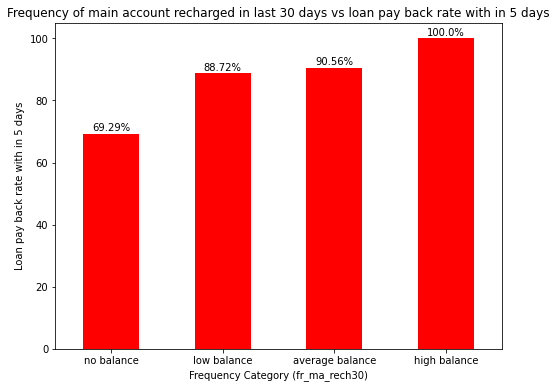

In [16]:
## Plotting the graph
plot_fre = bal['subscription%'].plot(kind = 'bar',
                                               color = ('Red'),
                                               figsize = (8,6))

plt.title('Frequency of main account recharged in last 30 days vs loan pay back rate with in 5 days')
plt.ylabel('Loan pay back rate with in 5 days')
plt.xlabel('Frequency Category (fr_ma_rech30)')
plt.xticks(rotation = 'horizontal')

# label the bar
for rec, label in zip(plot_fre.patches,
                      bal['subscription%'].round(2).astype(str)):
    plot_fre.text(rec.get_x() + rec.get_width()/2, 
                      rec.get_height() + 1, 
                      label+'%',  
                      ha = 'center', 
                      color = 'black')

       Observation:-
      1.Users with high balance always pays back the loan within 5 days 
      2.Average and low category only 9% - 12% users failed to payback the loan within 5%
      3.users with zero balance around 30% users are not paying the loan back within 5 days.

In [17]:
#Creating Frequency Groups for our visiualization
lst1 = [df]
for column in lst1:
    column.loc[column['fr_ma_rech30'] <=0, 'frequency_group'] = 'no_frequency'
    column.loc[(column['fr_ma_rech30'] >0) & (column['fr_ma_rech30'] >=1), 'frequency_group'] = 'low_frequency'
    column.loc[(column['fr_ma_rech30'] >1) & (column['fr_ma_rech30'] >=2), 'frequency_group'] = 'avg_frequency'
    column.loc[column['fr_ma_rech30'] >2, 'frequency_group'] = 'high_frequency'

In [18]:
#mapping the frequency groups
count_freq_response=pd.crosstab(df['label'],df['frequency_group']).apply(lambda x: x/x.sum()*100)
count_freq_response=count_freq_response.transpose()
count_freq_response

label                    0          1
frequency_group                      
avg_frequency     3.787999  96.212001
high_frequency    5.481040  94.518960
low_frequency     4.304873  95.695127
no_frequency     24.870684  75.129316

In [19]:
##Creating seperate samll dataframe for visualization
freq= pd.DataFrame(df['frequency_group'].value_counts())
freq['subs%']= count_freq_response[1]
freq.drop('frequency_group', axis=1, inplace= True)
freq['Freq'] = [3,0,1,2]
freq = freq.sort_values('Freq', ascending= True)
freq

subs%  Freq
no_frequency    75.129316     0
low_frequency   95.695127     1
avg_frequency   96.212001     2
high_frequency  94.518960     3

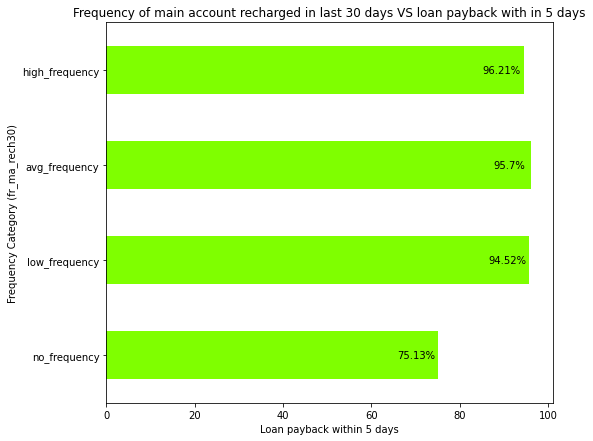

In [20]:
## plotting the graph
plot_freq = freq['subs%'].plot(kind='barh', color = ('chartreuse'), figsize = (8,7))
plt.title('Frequency of main account recharged in last 30 days VS loan payback with in 5 days')
plt.ylabel('Frequency Category (fr_ma_rech30)')
plt.xlabel('Loan payback within 5 days')
plt.xticks(rotation= 'horizontal')
## Labeling the bar
for re, label in zip(plot_freq.patches,freq['subs%'].sort_values(ascending = True).round(2).astype(str)):
    plot_freq.text(re.get_width()-5,
                       re.get_y()+re.get_height()-0.3,
                       label+'%',
                       ha = 'center',
                       va='bottom',
                       color = 'black')

    Observation:-
    1.There is no 100% rate in any frequency group to payback the loan within 5 days
    2.All average low and high frequency have atleast 6% to 4% users didn't payback the loan within 5 days.
    3.Comming to user have no frequency 25% users didn't payback the loan with in 5 days
    4.till now we can see that users with no balance and no frequency are costing huge losses, company should implement some kind of strategies to reduce that like send SMS alerts for notification.


In [21]:
## Creating Frequency Group for number of loan amounts
lst2= [df]
for column in lst2:
    column.loc[column['cnt_loans30'] <=0, 'loan_freq_group'] = 'no_loan'
    column.loc[(column['cnt_loans30'] >0) & (column['cnt_loans30'] <=1), 'loan_freq_group'] = 'low_loan'
    column.loc[(column['cnt_loans30'] >1) & (column['cnt_loans30'] <=4), 'loan_freq_group'] = 'avg_loan'
    column.loc[(column['cnt_loans30'] >4), 'loan_freq_group'] = 'high_loan'

In [22]:
## mapping the laon Frequency groups to dataframe
count_loan_response=pd.crosstab(df['label'],df['loan_freq_group']).apply(lambda x:x/x.sum()*100)
count_loan_response=count_loan_response.transpose()
count_loan_response

label                    0           1
loan_freq_group                       
avg_loan          6.401495   93.598505
high_loan         1.619592   98.380408
low_loan         23.972816   76.027184
no_loan           0.000000  100.000000

In [23]:
##Creating seperate samll dataframe for visualization
loan_freq = pd.DataFrame(df['loan_freq_group'].value_counts())
loan_freq['subs%'] = count_loan_response[1]
loan_freq.drop('loan_freq_group',axis=1, inplace=True)
loan_freq['freq']=[2,3,1,0]
loan_freq=loan_freq.sort_values('freq',ascending = True)

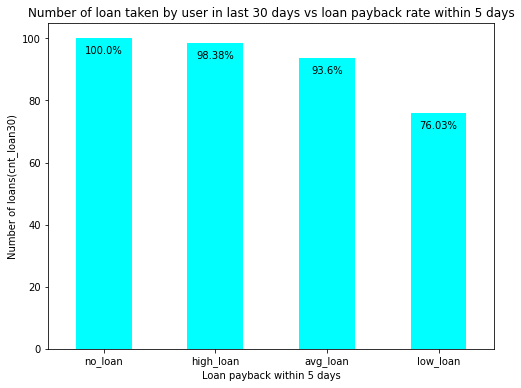

In [24]:
## plotting the graph
plot_freq1= loan_freq['subs%'].plot(kind= 'bar', color = ('cyan'), figsize=(8,6))
plt.title('Number of loan taken by user in last 30 days vs loan payback rate within 5 days')
plt.xlabel('Loan payback within 5 days')
plt.ylabel('Number of loans(cnt_loan30)')
plt.xticks(rotation = 'horizontal')

## label the bar
for re, label in zip(plot_freq1.patches,
                    loan_freq['subs%'].round(2).astype(str)):
    plot_freq1.text(re.get_x() + re.get_width()/2,
                   re.get_height()-5,
                    label+'%',
                    ha='center',
                    color='black')
                   


    Observation:-
    1.Majority user who took high loans in last 30 days are more likely to payback with in 5 days 
    2. 1.62% users failed to payback within 5 days
    3.among average loan user 7% users failed to payback the loan within 5 days 
    4.users with low loan have 24% didn't payback as expected might be defaulted.

In [25]:
## Creating Frequency Group for number of loan amounts in 90 days
lst3= [df]
for column in lst3:
    column.loc[column['amnt_loans90'] <=0, 'loan90_freq_group'] = 'no_loan'
    column.loc[(column['amnt_loans90'] >0) & (column['amnt_loans90'] <=6), 'loan90_freq_group'] = 'low_loan'
    column.loc[(column['amnt_loans90'] >6) & (column['amnt_loans90'] <=30), 'loan90_freq_group'] = 'medium_loan'
    column.loc[column['amnt_loans90'] >30, 'loan90_freq_group'] = 'high_loan'

In [26]:
## mapping the laon Frequency groups to dataframe
count_loan90_response=pd.crosstab(df['label'],df['loan90_freq_group']).apply(lambda x:x/x.sum()*100)
count_loan90_response=count_loan90_response.transpose()
count_loan90_response

label                      0           1
loan90_freq_group                       
high_loan           1.432771   98.567229
low_loan           27.262733   72.737267
medium_loan         7.197224   92.802776
no_loan             0.000000  100.000000

In [27]:
##Creating seperate samll dataframe for visualization
loan90_freq = pd.DataFrame(df['loan90_freq_group'].value_counts())
loan90_freq['subs%'] = count_loan_response[1]
loan90_freq.drop('loan90_freq_group',axis=1, inplace=True)
loan90_freq['freq']=[3,1,2,0]
loan90_freq=loan_freq.sort_values('freq',ascending = True)

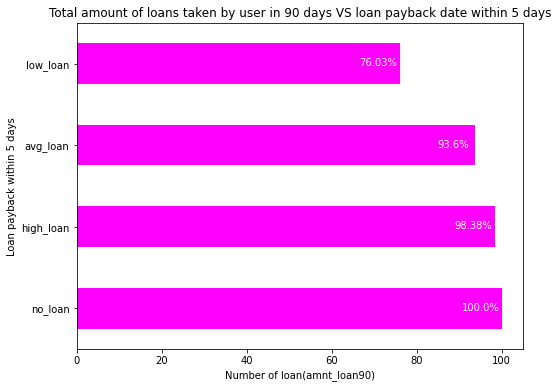

In [28]:
## Plotting the graph
plot_freq2= loan90_freq['subs%'].plot(kind='barh', color=('magenta'), figsize=(8,6))
plt.title('Total amount of loans taken by user in 90 days VS loan payback date within 5 days')
plt.xlabel('Number of loan(amnt_loan90)')
plt.ylabel('Loan payback within 5 days')
plt.xticks(rotation = 'horizontal')

## label the bar
for re, label in zip(plot_freq2.patches,loan90_freq['subs%'].sort_values(ascending = False).round(2).astype(str)):
    plot_freq2.text(re.get_width()-5,
                       re.get_y()+re.get_height()-0.3,
                       label+'%',
                       ha = 'center',
                       va='bottom',
                       color = 'white')
                                      

    From the we can see that we can observe almost same results for the loan amount taken in 30 days.

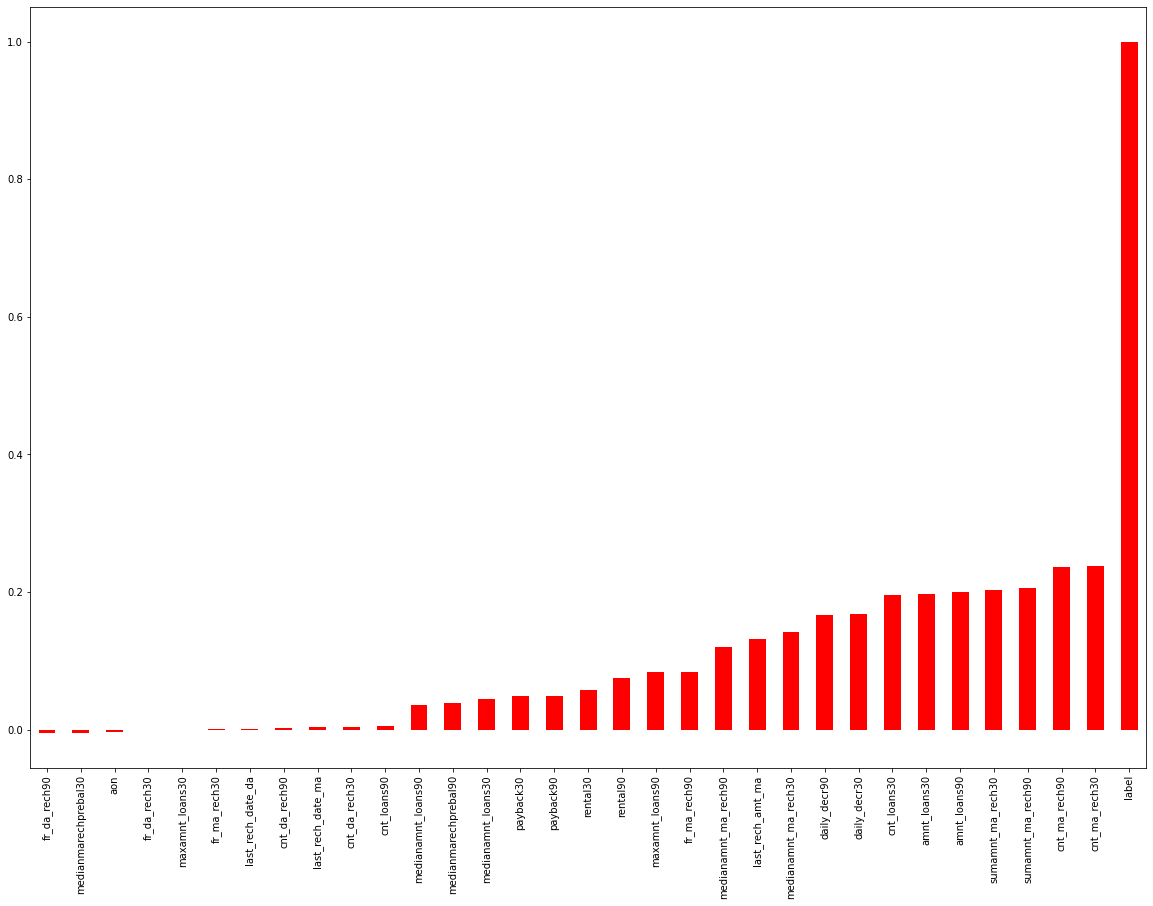

In [29]:
plt.figure(figsize = (20,14))
df.corr()['label'].sort_values().plot(kind ='bar',color='red')

In [30]:
# Checking the label corelation with other features
df.corr()['label'].sort_values()

fr_da_rech90           -0.005418
medianmarechprebal30   -0.004829
aon                    -0.003785
fr_da_rech30           -0.000027
maxamnt_loans30         0.000248
fr_ma_rech30            0.001330
last_rech_date_da       0.001711
cnt_da_rech90           0.002999
last_rech_date_ma       0.003728
cnt_da_rech30           0.003827
cnt_loans90             0.004733
medianamnt_loans90      0.035747
medianmarechprebal90    0.039300
medianamnt_loans30      0.044589
payback30               0.048336
payback90               0.049183
rental30                0.058085
rental90                0.075521
maxamnt_loans90         0.084144
fr_ma_rech90            0.084385
medianamnt_ma_rech90    0.120855
last_rech_amt_ma        0.131804
medianamnt_ma_rech30    0.141490
daily_decr90            0.166150
daily_decr30            0.168298
cnt_loans30             0.196283
amnt_loans30            0.197272
amnt_loans90            0.199788
sumamnt_ma_rech30       0.202828
sumamnt_ma_rech90       0.205793
cnt_ma_rec

    From the above we can see that there are few features which are not necessary with respect to label, so we can drop them.


In [31]:
## Dropping the negative correlated feautres and extra features created for visualization
df.drop(['msisdn', 'pcircle', 'pdate','fr_da_rech90', 'medianmarechprebal30', 'aon', 'fr_da_rech30', 'maxamnt_loans30', 'balance_group', 'frequency_group', 'loan_freq_group','loan90_freq_group'],axis=1,inplace=True)
#f.drop(['msisdn', 'pcircle', 'pdate','balance_group','frequency_group','loan_freq_group','loan90_freq_group'],axis=1,inplace=True)

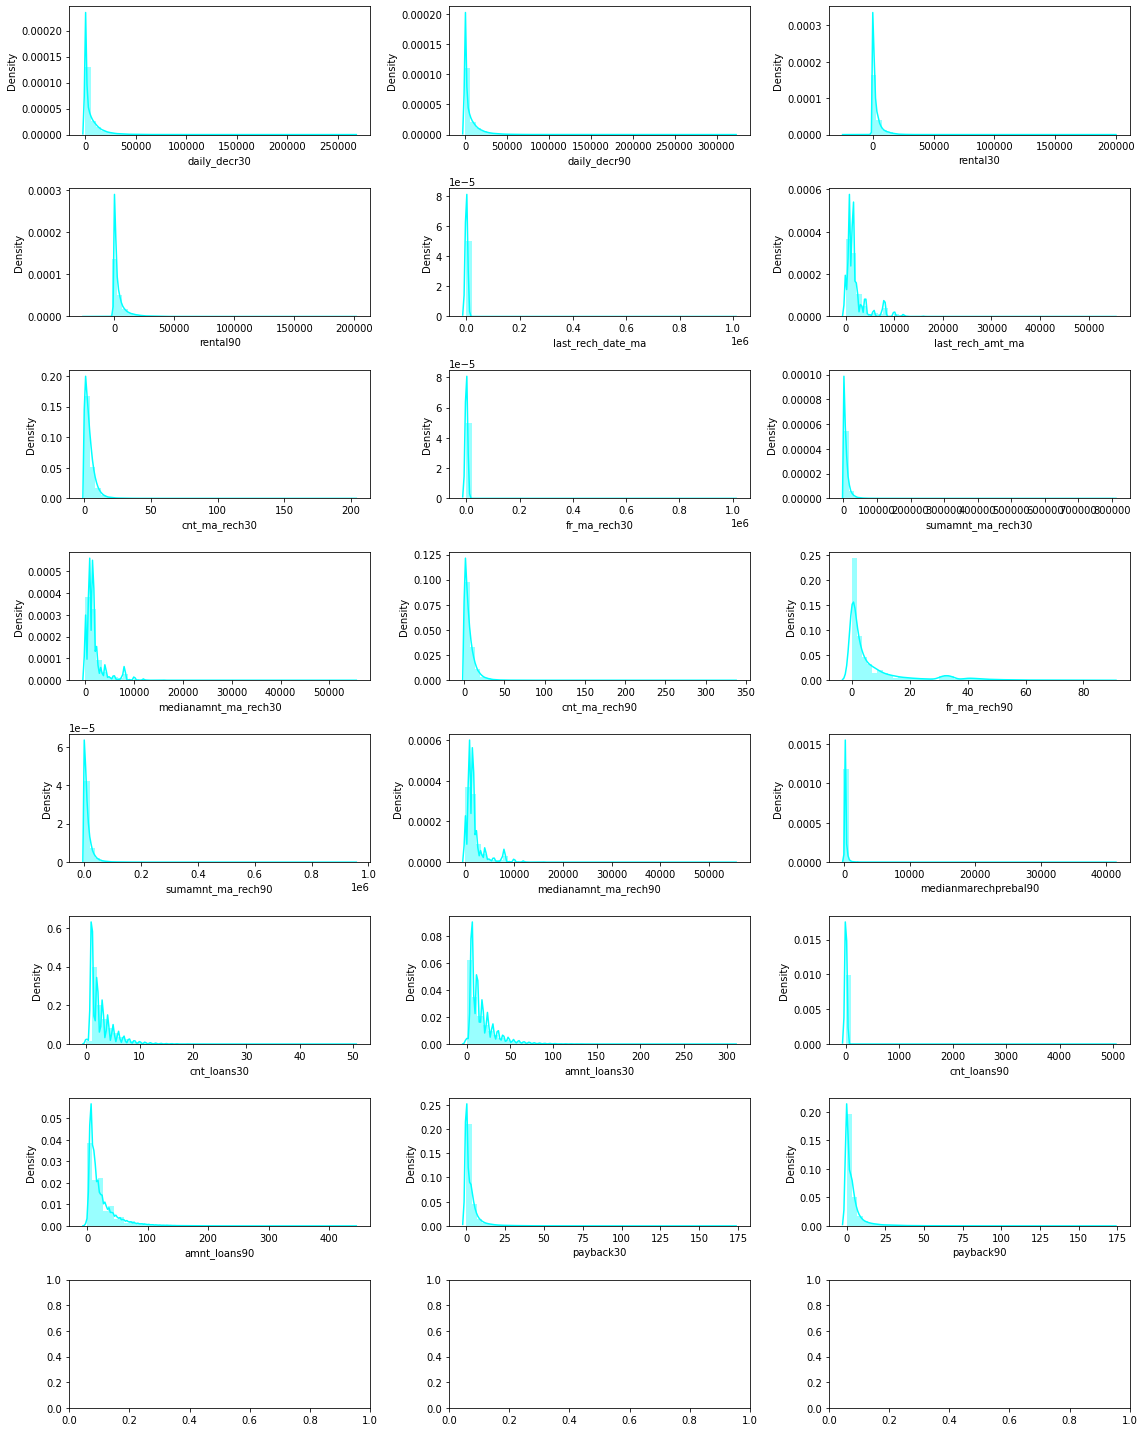

In [32]:
columns=['daily_decr30', 'daily_decr90', 'rental30', 'rental90','last_rech_date_ma', 'last_rech_amt_ma', 'cnt_ma_rech30',
         'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30','cnt_ma_rech90', 'fr_ma_rech90','sumamnt_ma_rech90', 
         'medianamnt_ma_rech90', 'medianmarechprebal90','cnt_loans30', 'amnt_loans30', 'cnt_loans90', 'amnt_loans90',
         'payback30', 'payback90']
fig,ax = plt.subplots(8,3,figsize=(16,20))
ax = ax.flatten()
for i,col in enumerate(columns):
    sns.distplot(df[col],ax=ax[i],color='cyan')
plt.tight_layout()
plt.show()

    From the above we can see that most of the data is rightly skewed and there are multiple outliers in most of the features, so we have to deal with these outliers.

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   daily_decr30          209593 non-null  float64
 2   daily_decr90          209593 non-null  float64
 3   rental30              209593 non-null  float64
 4   rental90              209593 non-null  float64
 5   last_rech_date_ma     209593 non-null  float64
 6   last_rech_date_da     209593 non-null  float64
 7   last_rech_amt_ma      209593 non-null  int64  
 8   cnt_ma_rech30         209593 non-null  int64  
 9   fr_ma_rech30          209593 non-null  float64
 10  sumamnt_ma_rech30     209593 non-null  float64
 11  medianamnt_ma_rech30  209593 non-null  float64
 12  cnt_ma_rech90         209593 non-null  int64  
 13  fr_ma_rech90          209593 non-null  int64  
 14  sumamnt_ma_rech90     209593 non-null  int64  
 15  

For this dataset i would chose outlier imputation technique for the features whose z-score>5, mean imputing, and also applied cube root to bring the data closer to normal distribution.

In [34]:
threashold=5
## Imputting outliers
from scipy.stats import zscore
for i in range(len(columns)):
    df[columns[i]]=zscore(df[columns[i]])
    for j in range(len(df[columns[i]])):
        if df[columns[i]][j]>5 or df[columns[i]][j]<-5:
            df[columns[i]].replace(df[columns[i]][j],df[columns[i]].median(),inplace=True)
    df[columns[i]]=np.cbrt((df[columns[i]]))

1    183431
0     26162
Name: label, dtype: int64


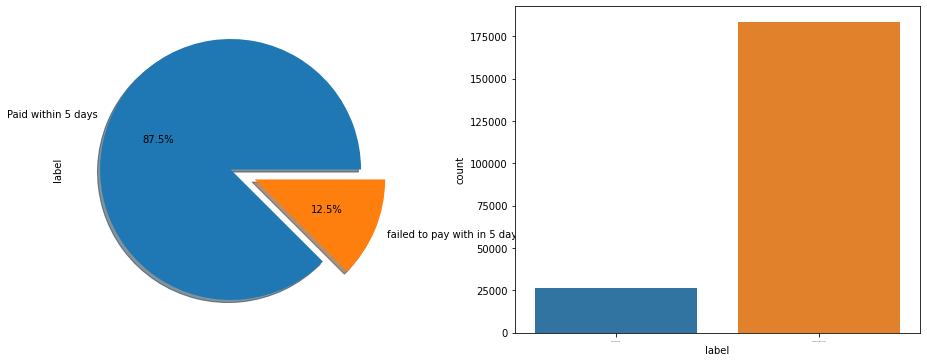

In [35]:
print(df['label'].value_counts())
f,ax=plt.subplots(1,2,figsize=(16,6))
labels = ['Paid within 5 days', 'failed to pay with in 5 days']
df['label'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[0],shadow=True,labels=labels,fontsize=10)
sns.countplot('label', data=df, ax=ax[1])
ax[1].set_xticklabels(['Paid within 5 days', 'failed to pay with in 5 days'], fontsize=0)
plt.show()

From the above we can see that the dataset is highly imbalanced as 87% paid in 5 days, and only 12% failed to payback, so we need to work on that or else our model will be more baised towards sucess and make false interpretation.


### Data Preprocessing

In [36]:
from sklearn.metrics import confusion_matrix,classification_report,auc,roc_curve,roc_auc_score,precision_score,f1_score,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
# import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier,AdaBoostClassifier,ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics

In [37]:
#Train and test split
Y = df['label']
X = df.drop('label',axis=1)

### SMOTE

In [38]:
# import SMOTE module from imblearn library

from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 42) 
x_res,y_res=sm.fit_sample(X,Y)
x_res.shape, y_res.shape


((366862, 27), (366862,))

In [39]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x_res)

In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.3, random_state=1)

### Model Building

In [41]:
accuracy = []
precision = []
recall = []
f1_score = []
logLoss = []
Auc_roc_score=[]
cvs=[]

def calculate_metrics(y_test, y_pred):
    acc = metrics.accuracy_score(y_true = y_test, y_pred = y_pred)
    pre = metrics.precision_score(y_true = y_test, y_pred = y_pred)
    rec = metrics.recall_score(y_true = y_test, y_pred = y_pred)
    f1 = metrics.f1_score(y_true = y_test, y_pred = y_pred)
    log_loss = metrics.log_loss(y_true = y_test, y_pred = y_pred)
    
    
    accuracy.append(acc)
    precision.append(pre)
    recall.append(rec)
    f1_score.append(f1)
    logLoss.append(log_loss)

In [42]:
# knnClassifier = KNeighborsClassifier()
# knnClassifier.fit(x_train, y_train)
# knnClassifier_prediction = knnClassifier.predict(x_test)
# calculate_metrics(y_test, knnClassifier_prediction)

In [43]:
#XGBC=xgb.XGBClassifier()
#XGBC.fit(x_train, y_train)
#XGBC_prediction = XGBC.predict(x_test)
#calculate_metrics(y_test, XGBC_prediction)
#XGBC_roc = roc_auc_score(y_test, XGBC_prediction)
#Auc_roc_score.append(XGBC_roc)
#cross_val_score(lasso, X, y, cv=3)

In [44]:
LR=LogisticRegression()
LR.fit(x_train, y_train)
LR_prediction=LR.predict(x_test)
calculate_metrics(y_test, LR_prediction)
LR_roc = roc_auc_score(y_test, LR_prediction)
Auc_roc_score.append(LR_roc)
cvs.append(cross_val_score(LR, x_res, y_res, cv=3).mean())

In [45]:
DT=DecisionTreeClassifier()
DT.fit(x_train, y_train)
DT_prediction=DT.predict(x_test)
calculate_metrics(y_test, DT_prediction)
DT_roc = roc_auc_score(y_test, DT_prediction)
Auc_roc_score.append(DT_roc)
cvs.append(cross_val_score(DT, x_res, y_res, cv=3).mean())

In [46]:
GNB=GaussianNB()
GNB.fit(x_train, y_train)
GNB_prediction=GNB.predict(x_test)
calculate_metrics(y_test, GNB_prediction)
GNB_roc = roc_auc_score(y_test, GNB_prediction)
Auc_roc_score.append(GNB_roc)
cvs.append(cross_val_score(GNB, x_res, y_res, cv=3).mean())

In [47]:
RNDC=RandomForestClassifier()
RNDC.fit(x_train, y_train)
RNDC_prediction = RNDC.predict(x_test)
calculate_metrics(y_test, RNDC_prediction)
RNDC_roc = roc_auc_score(y_test, RNDC_prediction)
Auc_roc_score.append(RNDC_roc)
cvs.append(cross_val_score(RNDC, x_res, y_res, cv=3).mean())

In [48]:
GBC=GradientBoostingClassifier()
GBC.fit(x_train, y_train)
GBC_prediction=GBC.predict(x_test)
calculate_metrics(y_test, GBC_prediction)
GBC_roc = roc_auc_score(y_test, GBC_prediction)
Auc_roc_score.append(LR_roc)
cvs.append(cross_val_score(GBC, x_res, y_res, cv=3).mean())

In [49]:
ABC=AdaBoostClassifier()
ABC.fit(x_train, y_train)
ABC_prediction=ABC.predict(x_test)
calculate_metrics(y_test, ABC_prediction)
ABC_roc = roc_auc_score(y_test, ABC_prediction)
Auc_roc_score.append(ABC_roc)
cvs.append(cross_val_score(ABC, x_res, y_res, cv=3).mean())

In [50]:
ETC=ExtraTreesClassifier()
ETC.fit(x_train, y_train)
ETC_prediction=ETC.predict(x_test)
calculate_metrics(y_test, ETC_prediction)
ETC_roc = roc_auc_score(y_test, ETC_prediction)
Auc_roc_score.append(ETC_roc)
cvs.append(cross_val_score(ETC, x_res, y_res, cv=3).mean())

In [51]:
results = pd.DataFrame(data = {'accuracy':accuracy, 'precision': precision ,
                               'recall': recall,'f1_score': f1_score,'Roc':Auc_roc_score,'Cross Val':cvs},
             index = ['LogisticRegression','DecisionTreeClassifier','GaussianNB',"Random Forest",'GradientBoostingClassifier','AdaBoostClassifier','ExtraTreesClassifier'] )
results



accuracy  precision    recall  f1_score       Roc  \
LogisticRegression          0.727237   0.784361  0.626228  0.696430  0.727161   
DecisionTreeClassifier      0.890504   0.896867  0.882302  0.889524  0.890498   
GaussianNB                  0.649343   0.842233  0.366880  0.511116  0.649130   
Random Forest               0.936380   0.936157  0.936532  0.936344  0.936380   
GradientBoostingClassifier  0.864055   0.879753  0.843148  0.861062  0.727161   
AdaBoostClassifier          0.814509   0.827030  0.795010  0.810704  0.814494   
ExtraTreesClassifier        0.945511   0.955501  0.934458  0.944863  0.945503   

                            Cross Val  
LogisticRegression           0.734655  
DecisionTreeClassifier       0.888179  
GaussianNB                   0.652183  
Random Forest                0.931612  
GradientBoostingClassifier   0.862142  
AdaBoostClassifier           0.814982  
ExtraTreesClassifier         0.945143

### HyperParameter Tunning


In [52]:
from sklearn.model_selection import RandomizedSearchCV
params4 = {
    'n_estimators': range(50,200,25),
    'max_features': range(1,13,2),
    'min_samples_leaf': range(2,10,1),
    'min_samples_split': range(2,10,1),
}



In [53]:
r_search3=RandomizedSearchCV(ETC,param_distributions=params4,n_iter=10,scoring='f1_weighted',n_jobs=-1,cv=10,verbose=3)

In [54]:
r_search3.fit(x_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 38.0min finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=ExtraTreesClassifier(bootstrap=False,
                                                  ccp_alpha=0.0,
                                                  class_weight=None,
                                                  criterion='gini',
                                                  max_depth=None,
                                                  max_features='auto',
                                                  max_leaf_nodes=None,
                                                  max_samples=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                       

In [55]:
r_search3.best_score_

0.930575094831217

In [56]:
model1=ExtraTreesClassifier(**r_search3.best_params_)
model1.fit(x_train,y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features=9,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=2, min_samples_split=5,
                     min_weight_fraction_leaf=0.0, n_estimators=75, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

   ### Conclusion

    1.All the ensemblers are giving good performance. 
    2.Extra Trees Classifier is giving best performance.